In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 4000

In [2]:
data_full = '../../data/biased.full'
data_train = '../../data/biased.word.train'
data_test = '../../data/biased.word.test'
data_dev = '../../data/biased.word.dev'

In [3]:
#full = pd.read_csv(data_full, sep='\t', names=["id", "src_tok", "tgt_tok", "src_raw", "tgt_raw", "src_POS_tags", "tgt_parse_tags"], on_bad_lines='skip')
train = pd.read_csv(data_train, sep='\t', names=["id", "src_tok", "tgt_tok", "src_raw", "tgt_raw", "src_POS_tags", "tgt_parse_tags"])
test = pd.read_csv(data_test, sep = '\t', names=["id", "src_tok", "tgt_tok", "src_raw", "tgt_raw", "src_POS_tags", "tgt_parse_tags"])
dev = pd.read_csv(data_dev, sep='\t', names=["id", "src_tok", "tgt_tok", "src_raw", "tgt_raw", "src_POS_tags", "tgt_parse_tags"])

checking shape

In [4]:
print(train.shape)
print(test.shape)
print(dev.shape)


(53803, 7)
(1000, 7)
(700, 7)


In [5]:
train.head()

,id,src_tok,tgt_tok,src_raw,tgt_raw,src_POS_tags,tgt_parse_tags
0,165188319,"ch ##lor ##of ##or ##m "" the molecular life ##...","ch ##lor ##of ##or ##m "" the molecular life ##...","chloroform ""the molecular lifesaver"" an articl...","chloroform ""the molecular lifesaver"" an articl...",NOUN NOUN NOUN NOUN NOUN PUNCT DET ADJ NOUN NO...,ROOT ROOT ROOT ROOT ROOT punct det amod dobj d...
1,123204846,the free software gnu class ##path project is ...,the free software gnu class ##path project is ...,the free software gnu classpath project is onl...,the free software gnu classpath project is par...,DET ADJ NOUN NOUN NOUN NOUN NOUN VERB ADV ADV ...,det amod nmod compound compound compound nsubj...
2,706783956,"other campaign ##ers , especially the controve...","other campaign ##ers , especially the british ...","other campaigners, especially the controversia...","other campaigners, especially the british acti...",ADJ NOUN NOUN PUNCT ADV DET ADJ ADJ NOUN ADJ N...,amod nsubj nsubj punct advmod det amod amod am...
3,612378448,vocalist rob half ##ord ' s performance is con...,vocalist rob half ##ord ' s performance is con...,vocalist rob halford's performance is consider...,vocalist rob halford's performance is consider...,ADJ X NOUN NOUN PUNCT PART NOUN VERB VERB NUM ...,amod amod poss poss punct case nsubjpass auxpa...
4,876796337,the proud general is a chinese animated featur...,the proud general is a chinese animated featur...,the proud general is a chinese animated featur...,the proud general is a chinese animated featur...,DET ADJ NOUN VERB DET ADJ VERB NOUN NOUN VERB ...,det amod nsubj ROOT det amod amod attr attr ac...


Tokens columns seem to have split words and filled # comapred to the raw text. Therefore inspecting the tokens columns quality with raw text data for different examples in the dataset

In [6]:
rand_ex = [30,100,150]
for col in train.columns[1:len(train.columns)]:
	print(col,":" , train.loc[30,col])

src_tok :  he ##ini ##e  was a popular nickname for german baseball players in the early part of the 20th century .
tgt_tok :  he ##ini ##e  was a common nickname for german baseball players in the early part of the 20th century .
src_raw : heinie was a popular nickname for german baseball players in the early part of the 20th century.
tgt_raw : heinie was a common nickname for german baseball players in the early part of the 20th century.
src_POS_tags : PUNCT NOUN NOUN NOUN PUNCT VERB DET ADJ NOUN ADP ADJ NOUN NOUN ADP DET ADJ NOUN ADP DET ADJ NOUN PUNCT
tgt_parse_tags : punct nsubj nsubj nsubj punct ROOT det amod attr prep amod compound pobj prep det amod pobj prep det amod pobj punct


In [7]:
for col in train.columns[1:len(train.columns)]:
	print(col,":" , train.loc[500,col])

src_tok : little cow ##po ##ke is the amazing first album by the grammy winning group nickel creek .
tgt_tok : little cow ##po ##ke is the first album by the grammy winning group nickel creek .
src_raw : little cowpoke is the amazing first album by the grammy winning group nickel creek.
tgt_raw : little cowpoke is the first album by the grammy winning group nickel creek.
src_POS_tags : ADJ NOUN NOUN NOUN VERB DET ADJ ADJ NOUN ADP DET ADJ VERB NOUN NOUN NOUN PUNCT
tgt_parse_tags : amod nsubj nsubj nsubj ROOT det amod amod attr prep det amod compound compound compound pobj punct


for some reason, the tokenized data has # values, that don't seem to be meaningful for the task at hand. since we will be contexualizing the words in our modeling. So we will drop these two columns of tokens

We will combine the datasets to analyse them all together

In [8]:
#dropping the columns 
train = train.drop(['src_tok', 'tgt_tok','src_POS_tags','tgt_parse_tags'], axis=1)
test = test.drop(['src_tok', 'tgt_tok','src_POS_tags','tgt_parse_tags'], axis=1)
dev = dev.drop(['src_tok', 'tgt_tok','src_POS_tags','tgt_parse_tags'], axis=1)

In [9]:
data = pd.concat([train,test,dev],ignore_index=True)
data.reset_index()

,index,id,src_raw,tgt_raw
0,0,165188319,"chloroform ""the molecular lifesaver"" an articl...","chloroform ""the molecular lifesaver"" an articl..."
1,1,123204846,the free software gnu classpath project is onl...,the free software gnu classpath project is par...
2,2,706783956,"other campaigners, especially the controversia...","other campaigners, especially the british acti..."
3,3,612378448,vocalist rob halford's performance is consider...,vocalist rob halford's performance is consider...
4,4,876796337,the proud general is a chinese animated featur...,the proud general is a chinese animated featur...
...,...,...,...,...
55498,55498,278865067,in 2008 five pharmaceutical companies have rec...,in 2008 five pharmaceutical companies received...
55499,55499,245123602,"the palm, a famous steakhouse restaurant chain...","the palm, a steakhouse restaurant chain origin..."
55500,55500,473235829,d.c. united's early domination,d.c. united's early successes
55501,55501,195118995,on 29 june 2007 price gave birth to her third ...,on 29 june 2007 price gave birth to her third ...


In [10]:
print(data.shape)

(55503, 3)


In [11]:
data.head()

,id,src_raw,tgt_raw
0,165188319,"chloroform ""the molecular lifesaver"" an articl...","chloroform ""the molecular lifesaver"" an articl..."
1,123204846,the free software gnu classpath project is onl...,the free software gnu classpath project is par...
2,706783956,"other campaigners, especially the controversia...","other campaigners, especially the british acti..."
3,612378448,vocalist rob halford's performance is consider...,vocalist rob halford's performance is consider...
4,876796337,the proud general is a chinese animated featur...,the proud general is a chinese animated featur...


In [12]:
data.dtypes

id         object
src_raw    object
tgt_raw    object
dtype: object

Check for duplicates using id column

In [13]:
ids = data['id']
print(len(ids))
len((ids.unique()))

55503


55497

total 6 duplicates. Inspect them

In [14]:
duplicate_ids = data['id'][data['id'].duplicated()]
duplicate_ids = duplicate_ids.to_numpy()
duplicate_ids

array([649752518, 232695029, 241894774, 674355053, 243772559, 170782428],
      dtype=object)

In [15]:
duplicate_data = data.loc[data['id'].isin(duplicate_ids)]
duplicate_data.sort_values('id')

,id,src_raw,tgt_raw
15151,170782428,to complete the lineup on their first full-len...,to complete the lineup on their first full-len...
47781,170782428,"full of the brothers' pop culture obsessions, ...","full of the brothers' pop culture obsessions, ..."
9959,232695029,"the armstrongs and fine served jail time, a co...","the armstrongs and fine served jail time, a co..."
16053,232695029,investigators believe that four people were in...,investigators believe that four people were in...
7086,241894774,"in addition, they all famously wear purity rin...","in addition, they all famously wear purity rin..."
44713,241894774,"they also abstain from alcohol, tobacco, and d...","they also report abstaing from alcohol, tobacc..."
20547,243772559,pettitte ended up getting the victory in the g...,pettitte ended up getting the victory in the g...
47039,243772559,"he recorded his 2, 000 career strikeout in the...","he recorded his 2, 000th career strikeout in t..."
15269,649752518,madeleine buckingham has served as chief execu...,madeleine buckingham has served as chief execu...
15560,649752518,mother jones (abbreviated mojo) is a far-left ...,mother jones (abbreviated mojo) is a american ...


these are different examples but with the same ids. Hence we will drop the column as it seems to be a bad data

In [16]:
data = data.drop('id',axis=1)

let's check these ids

Let's check the length distribution of the texts

In [17]:
data['src_raw'] = data['src_raw'].astype(str)
data['tgt_raw'] = data['tgt_raw'].astype(str)

In [18]:
# Create a new column to count the number of words in each string
data['src_len'] =  data['src_raw'].apply(lambda x: len(x.split()))
data['tgt_len'] =  data['tgt_raw'].apply(lambda x: len(x.split()))


In [19]:
data.head()

,src_raw,tgt_raw,src_len,tgt_len
0,"chloroform ""the molecular lifesaver"" an articl...","chloroform ""the molecular lifesaver"" an articl...",14,13
1,the free software gnu classpath project is onl...,the free software gnu classpath project is par...,17,16
2,"other campaigners, especially the controversia...","other campaigners, especially the british acti...",19,18
3,vocalist rob halford's performance is consider...,vocalist rob halford's performance is consider...,26,25
4,the proud general is a chinese animated featur...,the proud general is a chinese animated featur...,20,19


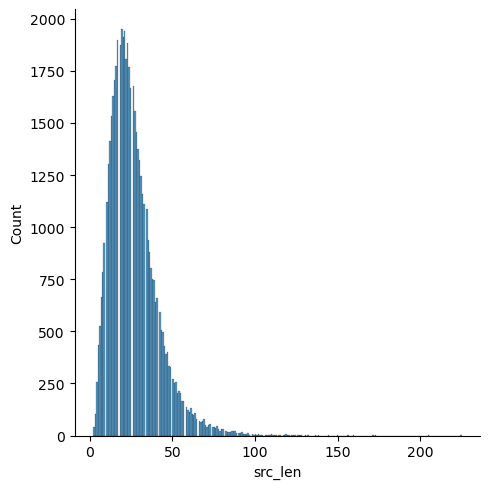

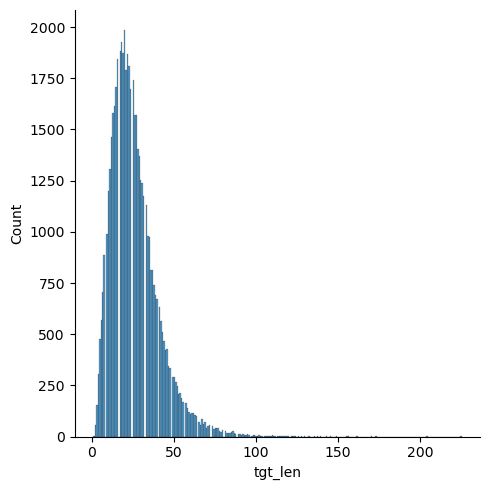

In [20]:
sns.displot(data=data, x = 'src_len')
sns.displot(data=data, x = 'tgt_len')
plt.show()

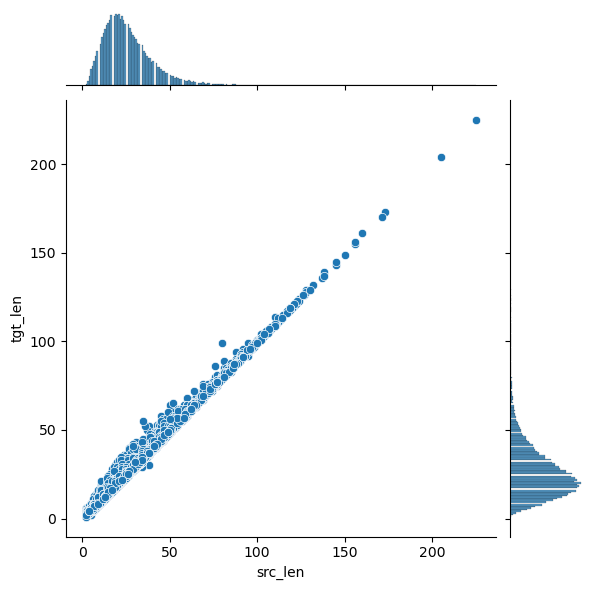

In [21]:
sns.jointplot(data=data, x = 'src_len', y = 'tgt_len')
plt.show()

Mostly the source and target lengths are similar as linearity suggests, suggesting that most eidts are just 1-2 words. 
There also slight deviances, some examples with lengths close to zero, and some examples with very high lengths. Those with very high length seem to be outliers. We might have to remove them in preprocessing. Let's check them out

near zero lengths

In [22]:
#getting minimum legth
data['src_len'].min()

2

In [23]:
#check a few examples
data.loc[data['src_len'] == 2]

,src_raw,tgt_raw,src_len,tgt_len
967,"!bgcolor=""#c0c0c0""| northwestern","!bgcolor=""#c0c0c0""| northwestren",2,2
1457,category:mormonism-related controversies,category:mormonism-related criticism,2,2
1914,redirect copy_protection,redirect copy prevention,2,3
5839,obama-ayers connection,obama-ayers controversy,2,2
7361,invasion (710756),conquest (710756),2,2
7937,post-trips expansionism,post-trips expansion,2,2
10185,redirect human_rights_situation_in_saddam's_iraq,redirect human rights situation in iraq,2,6
13491,non-mainstream hypotheses,fringe hypotheses,2,2
14318,anarcho-capitalism sic,anarcho-capitalism,2,1
15513,197988: superstardom,197988: stardom,2,2


some examples are strange due to some encoded elements added to them, such as "!bgcolor="#c0c0c0"| northwestern","style="width:12%;"| killer"
some examples have 'glued' words, such as "human_rights_situation_in_saddam's_iraq", "redirect copy_protection"


We Will not treat them as of yet. We will still go ahead with the modeling bit. If the perfromance is poor, we shall put in the necessary efforts, depending on the model to be used to do the data cleaning.



We can check these words with some predefined vocabulary and then remove those words that are not the real words

In [24]:
#getting max legth
data['src_len'].max()

225

In [28]:
import pprint

In [42]:
print(data['src_raw'].loc[data['src_len'] > 200])

15977    clayton waagner - us prisoner, faces 15 years ...
47042    (which introduced the concept of robots and th...
Name: src_raw, dtype: object


These seem fine.

Now let us check the difference in the source and target, in terms of edits made. 

In [43]:
data['edit_diff'] = data['tgt_len'] - data['src_len']

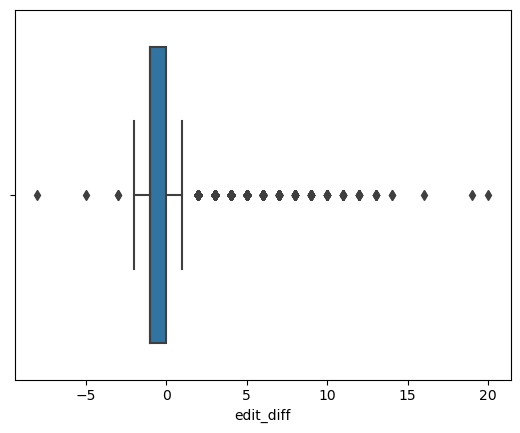

In [56]:
sns.boxplot(data=data,x='edit_diff')
plt.show()

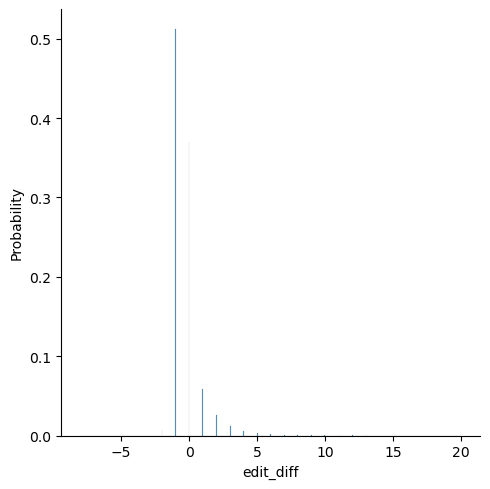

In [59]:
sns.displot(data=data,x='edit_diff',  stat="probability")
plt.show()

1. ~50% edits are removals. 
2. ~40% no change. Could either be no edit or single word replacement
3. few changes of more than one words. But since dataset is for one word edits, this shouldn't be happening
We ll check these scenarios one by one to understand our data better and make informed decision o the model to use and preprocessing to be done

1. Removals

In [62]:
data_removal = data.loc[data['edit_diff'] < 0]

In [63]:
data_removal.head()

,src_raw,tgt_raw,src_len,tgt_len,edit_diff
0,"chloroform ""the molecular lifesaver"" an articl...","chloroform ""the molecular lifesaver"" an articl...",14,13,-1
1,the free software gnu classpath project is onl...,the free software gnu classpath project is par...,17,16,-1
2,"other campaigners, especially the controversia...","other campaigners, especially the british acti...",19,18,-1
3,vocalist rob halford's performance is consider...,vocalist rob halford's performance is consider...,26,25,-1
4,the proud general is a chinese animated featur...,the proud general is a chinese animated featur...,20,19,-1


In [86]:
source_list = data_removal['src_raw'].to_list()
target_list = data_removal['tgt_raw'].to_list()

In [87]:
#checking some random samples
print("source : ", data_removal['src_raw'][0])
print("target : ", data_removal['tgt_raw'][0])

source :  chloroform "the molecular lifesaver" an article at oxford university providing interesting facts about chloroform.
target :  chloroform "the molecular lifesaver" an article at oxford university providing facts about chloroform.


In [88]:
print("source : ", source_list[5])
print("target : ", target_list[5])

source :  in early november 2014, a horrifying "price list" for yazidi and christian females surfaced online.
target :  in early november 2014, a "price list" for yazidi and christian females surfaced online.


In [104]:
#5 word edits
print("source : ", data_removal['src_raw'].loc[data_removal['edit_diff'] <= -5].to_list()[0])
print("target : ", data_removal['tgt_raw'].loc[data_removal['edit_diff'] <= -5].to_list()[0])

source :  recent acceptances from universities such as cornell , columbia , william and mary , duke university , davidson college , georgetown , smith , and washington and lee reveal a chatham hall girl is intelligent, driven, and loyal.
target :  recent acceptances from universities such as cornell, columbia, william and mary, duke, davidson college, georgetown, smith, and washington and lee reveal a chatham hall girl is intelligent, driven, and loyal.


In [105]:
#8 word edits
print("source : ", data_removal['src_raw'].loc[data_removal['edit_diff'] <= -5].to_list()[1])
print("target : ", data_removal['tgt_raw'].loc[data_removal['edit_diff'] <= -5].to_list()[1])

source :  during the conference "the collapse of europe" at pepperdine university, ayaan hirsi ali asked for " economic reform , meaning, to reduce government , where government is unnecessary , and especially the welfare state."
target :  during the conference "the collapse of europe" at pepperdine university, ayaan hirsi ali asked for "reform, meaning, to reduce government, where government is unnecessary, and especially the welfare state."


not exactly edits, but rather trimming of white spaces in the data

<b> we will need to clean the data for this discepency

2. No changes

In [106]:
data_zero_change = data.loc[data['edit_diff'] == 0]

In [107]:
source_list = data_zero_change['src_raw'].to_list()
target_list = data_zero_change['tgt_raw'].to_list()

In [109]:
#checking some random samples
print("source : ", source_list[5])
print("target : ", target_list[5])

source :  there are 75 immigrant settlers .
target :  there are 75 immigrant residents .


In [110]:
print("source : ", source_list[10])
print("target : ", target_list[10])

source :  the british broadcasting corporation or bbc is the most widely respected broadcasting organisation in the world.
target :  the british broadcasting corporation or bbc is the most widely regarded broadcasting organisation in the world.


In [111]:
print("source : ", source_list[15])
print("target : ", target_list[15])

source :  yusuf salaam, one of the five convicted , said that they had falsely confessed out of coercion, after having been mistreated by police while in custody, deprived of food, drink or sleep for over 24 hours.
target :  yusuf salaam, one of the five defendants , said that they had falsely confessed out of coercion, after having been mistreated by police while in custody, deprived of food, drink or sleep for over 24 hours.


These are great exqamples of neutralization with one word

3. Addition

In [112]:
data_additive_edits = data.loc[data['edit_diff'] > 0]

In [113]:
source_list = data_additive_edits['src_raw'].to_list()
target_list = data_additive_edits['tgt_raw'].to_list()

In [114]:
#checking some random samples
print("source : ", source_list[5])
print("target : ", target_list[5])

source :  the city of harran, in modern southern turkey (32 km/20 mi southeast of anlurfa, formerly edessa) near the border with syria, is probably the haran of the biblical accounts.
target :  the city of harran, in modern southern turkey (32 km/20 mi southeast of anlurfa, formerly edessa) near the border with syria, is believed to be the haran of the biblical accounts.


In [115]:
#checking some random samples
print("source : ", source_list[10])
print("target : ", target_list[10])

source :  vio-lence was a thrash metal band formed in 1985, that released a few demo tapes, one ep and 3 lps between 1985 and 1993. their classic line-up was phil demmel and robb flynn on guitars, dean dell on bass, perry strickland on drums and sean killian on vocals.
target :  vio-lence was a thrash metal band formed in 1985, that released a few demo tapes, one ep and 3 lps between 1985 and 1993. their most stable line-up was phil demmel and robb flynn on guitars, dean dell on bass, perry strickland on drums and sean killian on vocals.


In [116]:
#checking some random samples
print("source : ", source_list[50])
print("target : ", target_list[50])

source :  initially, those who declared they were 'unsure' whether or not humans had evolved were given one year to change their mind before facing dismissal; this was later relaxed and scientists were allowed to stay on as long as they did not endorse human evolution.
target :  initially, those who declared they were 'unsure' whether or not humans had evolved were given one year to change their mind before facing dismissal; this was later relaxed and advocates of evolution were allowed to stay on as long as they did not endorse human evolution.


In [122]:
#check more than 10 edits
data_additive_edits_large = data.loc[data['edit_diff'] > 10].sort_values('edit_diff')

In [119]:
source_list = data_additive_edits_large['src_raw'].to_list()
target_list = data_additive_edits_large['tgt_raw'].to_list()

In [123]:
#checking some random samples
print("source : ", source_list[0])
print("target : ", target_list[0])

source :  the atmospheric concentrations of carbon dioxide and methane have increased by 31% and 149% respectively above pre-industrial levels since 1750. this is considerably higher than at any time during the last 650,000 years, the period for which reliable data has been extracted from ice cores.
target :  although measurements were not taken during most of this time, it is believed that atmospheric concentrations of carbon dioxide and methane have increased by 31% and 149% respectively above pre-industrial levels since 1750. this is considerably higher than at any time during the last 650,000 years, the period for which reliable data has been extracted from ice cores.


this is more nuanced style transfer, with change in voice and text structure. Such edits will require more complicated language model

In [125]:
#checking some random samples
print("source : ", source_list[11])
print("target : ", target_list[11])

source :  in the politics of the united states, dark money is a term for funds given to nonprofit organizations—primarily 501(c)(4) (social welfare) and 501(c)(6) (trade association) groups—that can receive unlimited donations from corporations, individuals, and unions, and spend funds to influence elections, but are not required to disclose their donors.
target :  in the politics of the united states, dark money is a term used by advocates of open government and campaign finance reform to describe funds given to nonprofit organizations—primarily 501(c)(4) (social welfare) and 501(c)(6) (trade association) groups—that can receive unlimited donations from corporations, individuals, and unions, and spend funds to influence elections, but are not required to disclose their donors.


extra info added with the contexual knowledge

In [127]:
#checking some random samples
print("source : ", source_list[28])
print("target : ", target_list[28])

source :  hitler made in a public speech in berlin on 4 september 1940, hitler announced that the 'night piracy of the british' shall be countered by a concentrated night offensive against the island, and especially london.
target :  hitler `s patience was exhausted only after a succession of british raids on berlin, starting on the 25 august 1940. infuriated, in a public speech in berlin on 4 september 1940, hitler announced that the 'night piracy of the british ' shall be countered by a concentrated night offensive against the island, and especially london.


<b>Complete/huge changes in the sentence. Should be removed from the dataset

<h3> Let's identify the words most commonly removed, replaced or added

In [130]:
data_removal.tgt_raw